# Plot
Convenience class for visualizing pandas DataFrame and Series objects.

In [1]:
from plot import Plot
from tools import DATADIR, read_csv

COLOR = 'green black yellow blue red grey'.split()
ENERGY = DATADIR / 'examples/energy.csv'

## create a Plot object
Each `Plot` object stores default parameters.

In [2]:
plot = Plot()
plot

Plot({'axes': {'frame_on': False}, 'figure': {'clear': True, 'dpi': 100, 'edgecolor': None, 'facecolor': None, 'figsize': (10, 5), 'frameon': False, 'tight_layout': True}, 'legend': {'bbox_to_anchor': (1.05, 1), 'borderaxespad': 0.0, 'loc': 'upper left'}})

In [3]:
#bigplot = Plot(figsize=(20, 10))
#bigplot

In [4]:
plot.params

{'axes': {'frame_on': False},
 'figure': {'clear': True,
  'dpi': 100,
  'edgecolor': None,
  'facecolor': None,
  'figsize': (10, 5),
  'frameon': False,
  'tight_layout': True},
 'legend': {'bbox_to_anchor': (1.05, 1),
  'borderaxespad': 0.0,
  'loc': 'upper left'}}

In [5]:
# Unknown parameters will raise an error
try:
    Plot(spam='eggs')
except KeyError as err:
    print(err)

"unknown keyword arguments ['spam']"


In [24]:
plot.figure()

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Axes: >

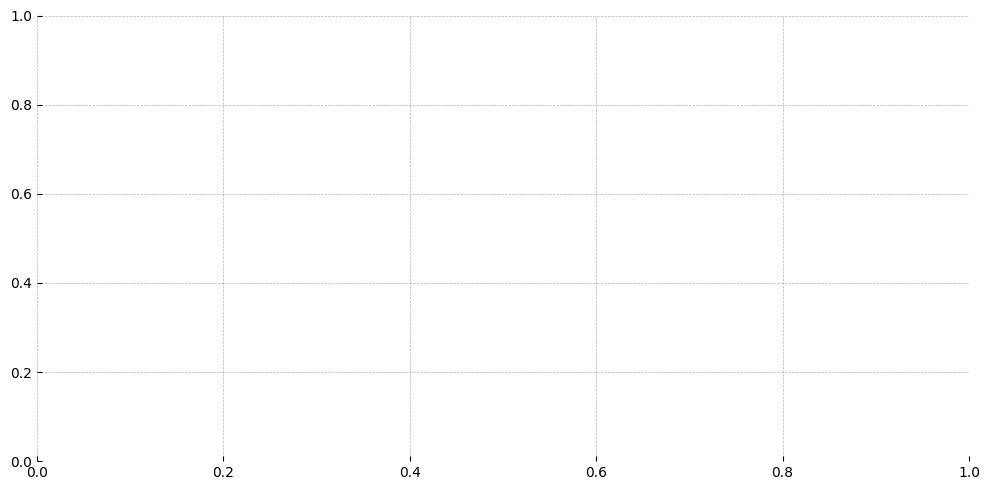

In [25]:
plot.axes()

## load example data

In [6]:
data = read_csv(ENERGY)

# Remove sneaky whitespace from column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Consolidate columns
del data['total']
data['hydro'] = data.pop('conv._hydro') + data.pop('ps_hydro')
data['gas'] = data.pop('lfg') + data.pop('natural_gas')

# Sort and filter
data = data.set_index('year').sort_index()
data = data.loc['2000':, data.sum().nlargest(6).index]

data.tail()

,nuclear,coal,gas,hydro,petroleum,net_imports
year,,,,,,
2012,40775,4551.0,60198.0,25303.0,580.0,26180.0
2013,44756,4697.0,55182.0,26397.0,1007.0,25694.0
2014,43041,4325.0,55169.0,26823.0,2136.0,22103.0
2015,44620,2046.0,57668.0,26704.0,1892.0,22273.0
2016,41638,1493.0,57541.0,27150.0,643.0,26117.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 2000 to 2016
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nuclear      17 non-null     int64  
 1   coal         17 non-null     float64
 2   gas          16 non-null     float64
 3   hydro        17 non-null     float64
 4   petroleum    17 non-null     float64
 5   net_imports  17 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 952.0 bytes


## area

Help on method area in module plot:

area(data, **kwargs) method of plot.Plot instance
    AxesSubplot: Area plot for each column.



<Axes: >

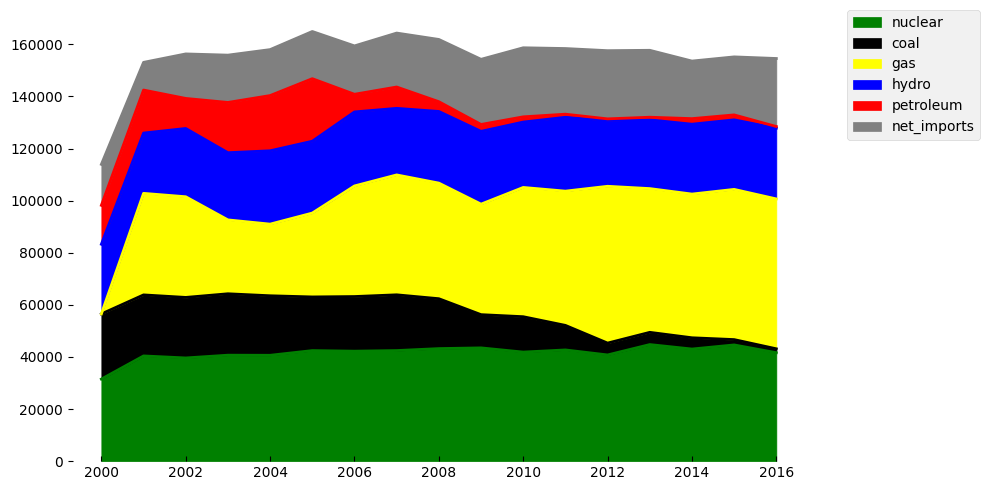

In [8]:
help(plot.area)
plot.area(data, color=COLOR)

## bar

Help on method bar in module plot:

bar(data, **kwargs) method of plot.Plot instance
    AxesSubplot: Bar plot for each column.



<Axes: >

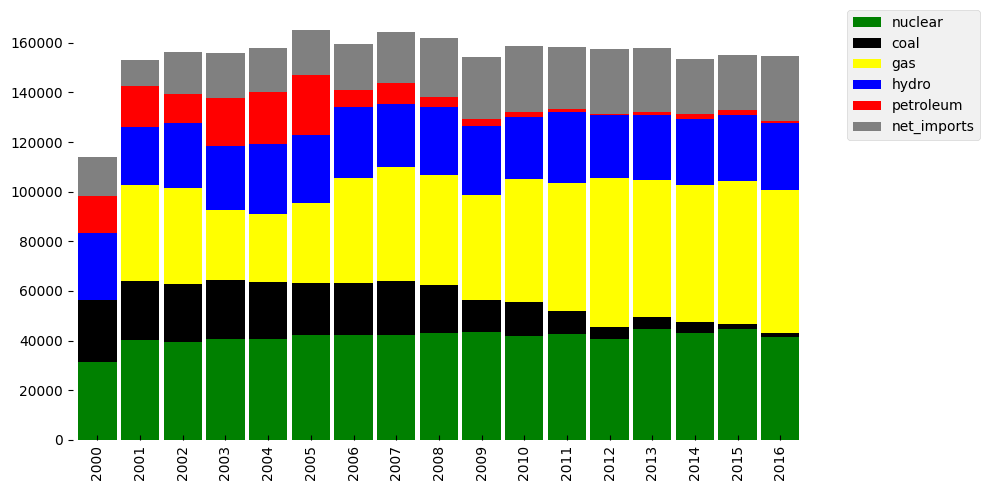

In [9]:
help(plot.bar)
plot.bar(data, color=COLOR)

## barh

Help on method barh in module plot:

barh(data, **kwargs) method of plot.Plot instance
    AxesSubplot: Horizontal bar plot for each column.



<Axes: >

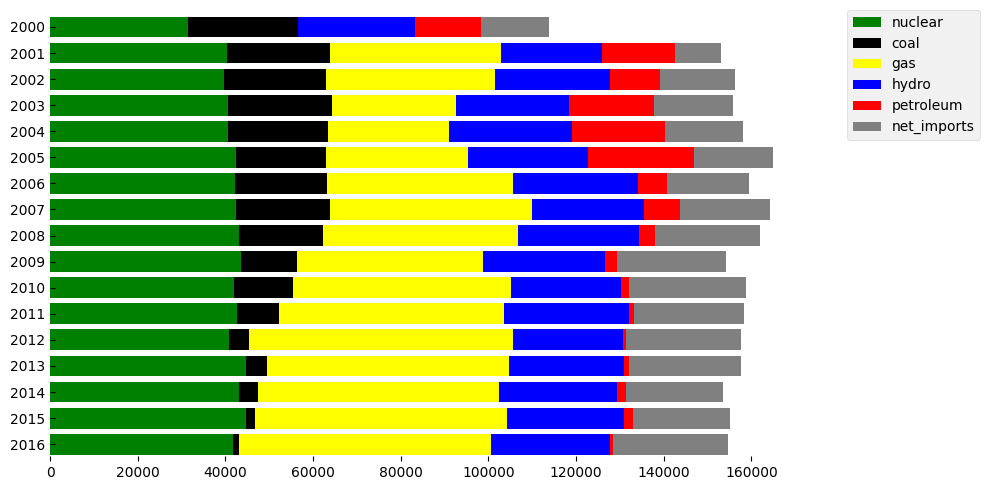

In [10]:
help(plot.barh)
plot.barh(data, color=COLOR)

## box

Help on method box in module plot:

box(data, **kwargs) method of plot.Plot instance
    AxesSubplot: Box plot for each column.



<Axes: >

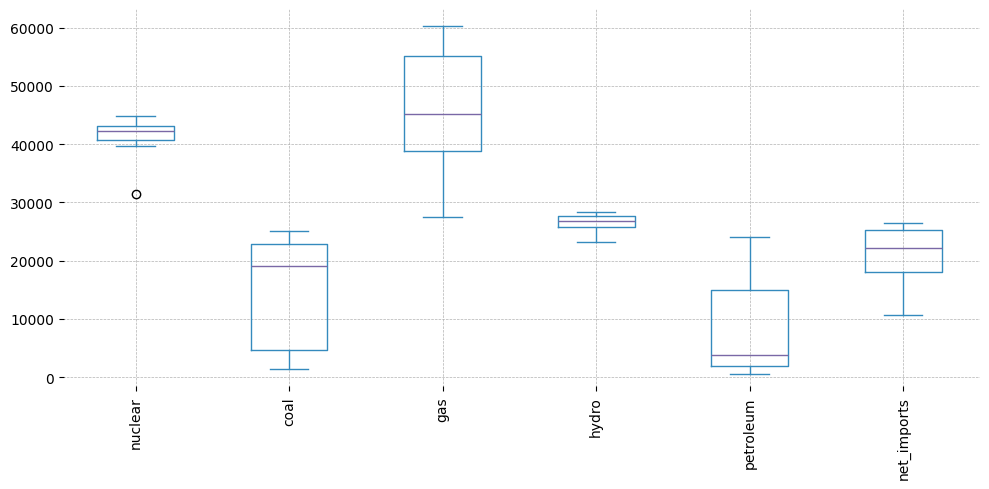

In [11]:
help(plot.box)
plot.box(data)

## boxh

Help on method boxh in module plot:

boxh(data, **kwargs) method of plot.Plot instance
    AxesSubplot: Horizontal box plot for each column.



<Axes: >

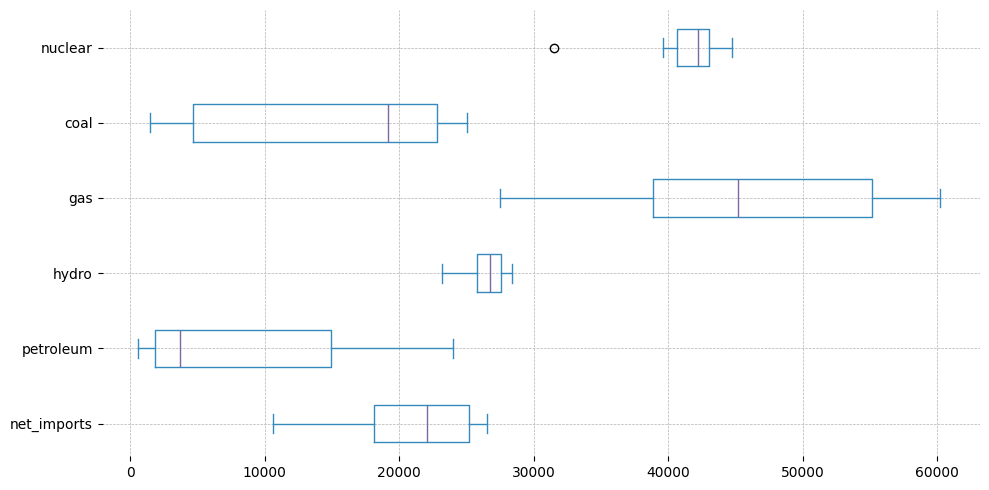

In [12]:
help(plot.boxh)
plot.boxh(data)

## density

Help on method density in module plot:

density(data, **kwargs) method of plot.Plot instance
    AxesSubplot: Probability density estimate for each column.



<Axes: >

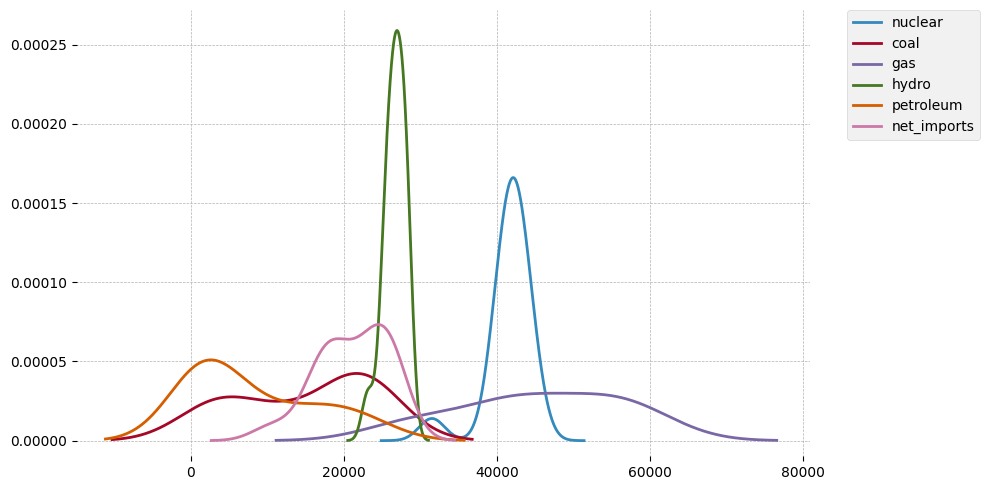

In [13]:
help(plot.density)
plot.density(data)

## heat

Help on method heat in module plot:

heat(data, **kwargs) method of plot.Plot instance
    AxesSubplot: Heatmap with same rows and columns as input.



<Axes: >

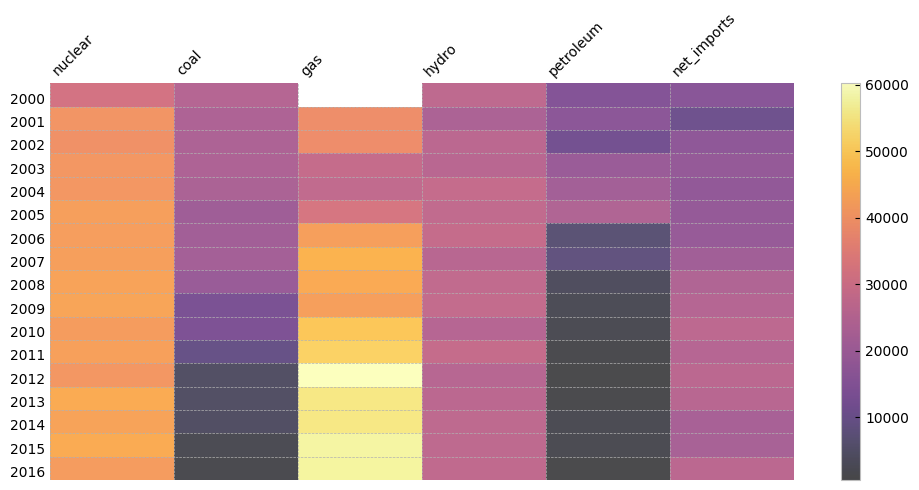

In [14]:
help(plot.heat)
plot.heat(data, colorbar=True)

## hist

Help on method hist in module plot:

hist(data, **kwargs) method of plot.Plot instance
    AxesSubplot: Histogram for each column.



<Axes: >

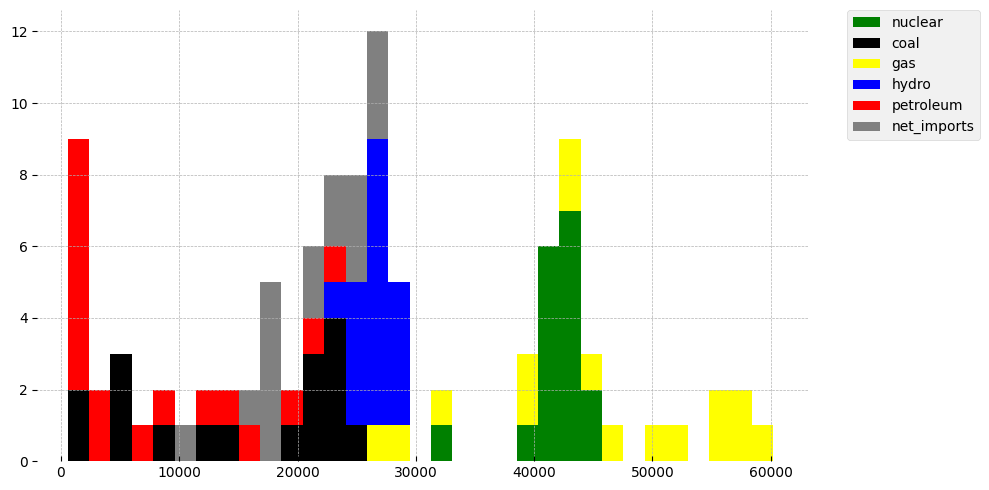

In [15]:
help(plot.hist)
plot.hist(data, color=COLOR)

## line

Help on method line in module plot:

line(data, **kwargs) method of plot.Plot instance
    AxesSubplot: Line plot for each column.



<Axes: >

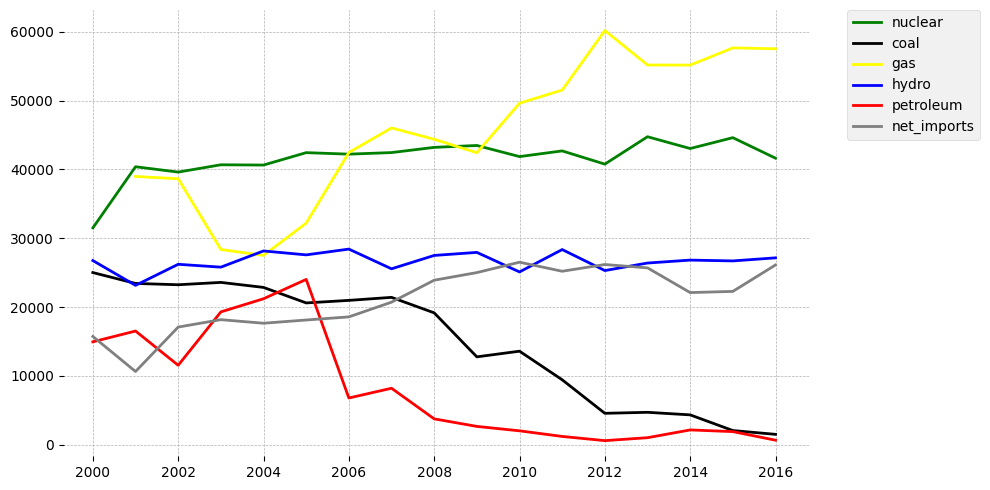

In [16]:
help(plot.line)
plot.line(data, color=COLOR)

## quant

In [17]:
help(plot.quant)

Help on method quant in module plot:

quant(ts, freq, q=(), **kwargs) method of plot.Plot instance
    AxesSubplot: Contour plot of quantiles per period.
    Input must be a Series with a datetime-like index.



In [18]:
from pandas import Series, to_datetime

ts = data['coal'].copy()
ts.index = to_datetime(data.index, format='%Y')
ts.head()

year
2000-01-01    25010.0
2001-01-01    23432.0
2002-01-01    23239.0
2003-01-01    23581.0
2004-01-01    22853.0
Name: coal, dtype: float64

<Axes: >

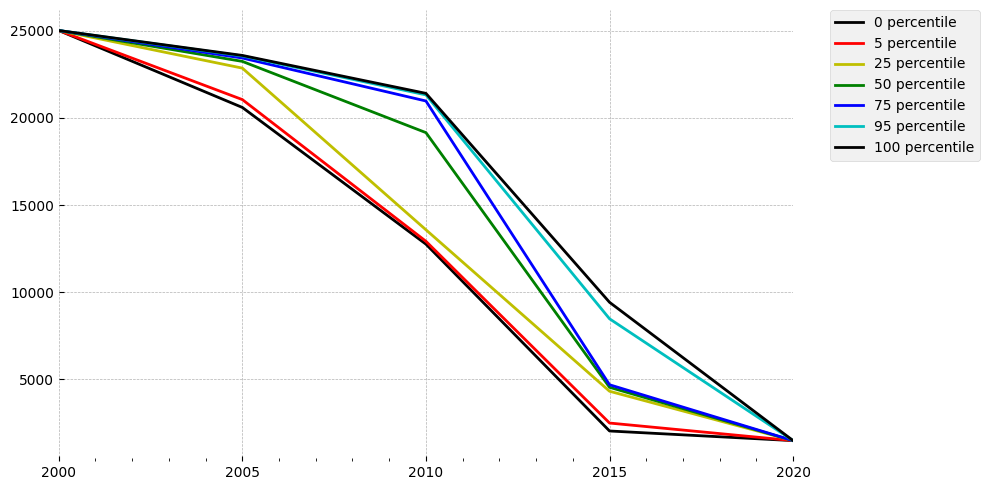

In [19]:
plot.quant(ts, '5Y')

## scatter

In [20]:
help(plot.scatter)

Help on method scatter in module plot:

scatter(data, **kwargs) method of plot.Plot instance
    AxesSubplot: Scatterplot with first 2 columns as (x,y) pairs.
    If 3rd column exists, then its values are point colors.
    If 4th column exists, then its values are point sizes.



In [21]:
points = data.stack().reset_index()
points.columns = 'year source energy'.split()
points['color'] = points['source'].map(dict(zip(data.columns, COLOR)))
points['size'] = 200 * data.div(data.sum(axis=1), axis=0).stack().values
points = points['year energy color size'.split()]

points

,year,energy,color,size
0,2000,31508.0,green,55.306787
1,2000,25010.0,black,43.900684
2,2000,26753.0,blue,46.960216
3,2000,14945.0,red,26.233335
4,2000,15723.0,grey,27.598978
...,...,...,...,...
96,2016,1493.0,black,1.931661
97,2016,57541.0,yellow,74.447219
98,2016,27150.0,blue,35.126988
99,2016,643.0,red,0.831921


/usr/local/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='year', ylabel='GWh'>

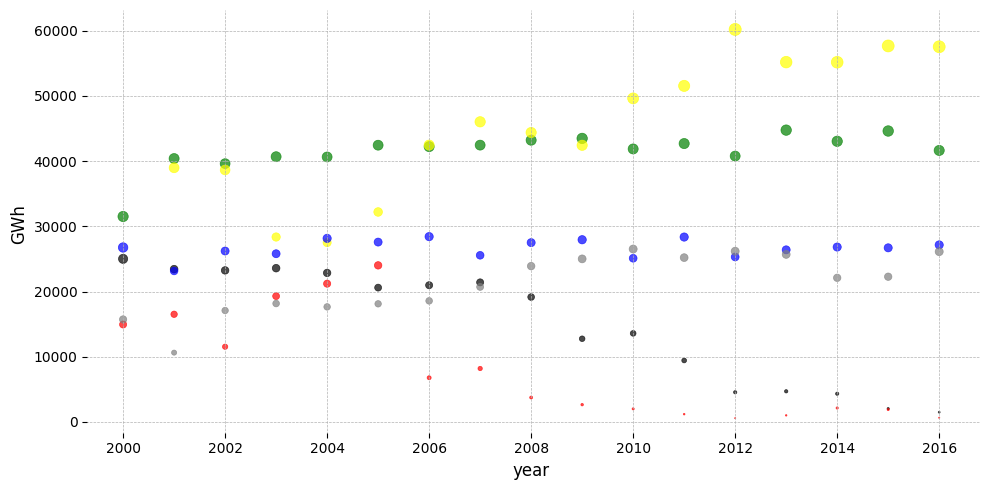

In [22]:
plot.scatter(points, xlabel='year', ylabel='GWh')

## help

In [23]:
help(Plot)

Help on class Plot in module plot:

class Plot(builtins.object)
 |  Plot(style='bmh', **kwargs)
 |  
 |  Visualize pandas.DataFrame or .Series inputs.
 |  
 |  Each Plot() object remembers its own default parameters.
 |  Most methods are thin wrappers around DataFrame plot methods.
 |  Call a Plot() to call to DataFrame.plot() with custom arguments.
 |  
 |  Caution: Modifies matplotlib.style when an object is created.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, data, **kwargs)
 |      Call self as a function.
 |  
 |  __init__(self, style='bmh', **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  area(self, data, **kwargs)
 |      AxesSubplot: Area plot for each column.
 |  
 |  axes(self, **kwargs)
 |      AxesSubplot: Create blank axes.
 |  
 |  bar(self, data, **kwargs)
 |      AxesSubplot: Bar plot for each column.
 |  
 |  barh(self, data, **kwargs)
 |      AxesSubplot: Horizontal 